# Image Filtering using Python

## Table of Contents
* [Introduction](#Introduction)
    * [Ideal Filter](#5_1_Ideal_Filter)
    * [Butterworth Filter](#5_2_Butterworth_Filter)
* [Python Implementation](#Implementation)
* [Applying Filters](#Apply)

<a name="Introduction"></a>
## Introduction

Image filtering is a way of modifying an image. It can be used for different purposes such as blurring, sharpening and noise removal. It can either be applied in spatial or frequency domain. Some of the spatial domain filtering ways are:
   * Neighborhood Averageing
   * Median Filtering
   * etc.
   
The frequency domain filtering include:
   * Ideal Filtering
   * Butterworth Filtering
   * Exponential Filtering
   * Trapezoidal Filtering
   * etc.
   
In this home work, we are going to focus on frequency domain filtering methods, especially, Ideal and Butterworth filters. These can be used in either lowpass or highpass filtering. Lowpassing passes the low frequency values and blocks the high frequencies. While highpass is the opposite.

In the next section, we are going to implement the ***ideal*** and ***butterworth*** filters that will be used for both ***lowpass*** and ***highpass*** filtering.

<a id="5_1_Ideal_Filter"></a>
### Ideal Filter

A two-dimensional ***ideal lowpass filter (ILPF)*** is a lowpass filter whose transfer function is defined as follows:

$$
H(u,v)=
\begin{cases}
1  \hspace{1cm} if \; D(u,v) \leq D_0\\
0 \hspace{1cm} if \; D(u,v) > D_0
\end{cases}
$$

Where $D_0$ is the cut-off frequency (which is a non-negative number) and D(u, v) is the distance from the point (u, v) to the origin of the frequency plane. $D(u,v)$ is computed as:

$$ D(u,v) = \sqrt{u^2 + v^2}$$

Similarly, the ***ideal highpass filter (IHPF)*** is defined as:

$$
H(u,v)=
\begin{cases}
0  \hspace{1cm} if \; D(u,v) \leq D_0\\
1 \hspace{1cm} if \; D(u,v) > D_0
\end{cases}
$$

After the tranfer function is constructed, we applied to the image in frequency domain, $F$, to get the filtered image, $G$.

$$ G(u,v) = H(u,v)*F(u,v) $$

*N.B.: The above product uses an element-wise multiplication.*

Finally, the filtered image in spatial domain is calculated as follows:

$$ g(x,y) = G^{-1}(u,v) $$

Where $G^{-1}$ is the inverse FFT.

<a id="5_2_Butterworth_Filter"></a>
### Butterworth Filter

A two-dimensional ***Butterworth lowpass filter (BLPF)*** of order $n$ is a lowpass filter whose transfer function is defined as follows:

$$
H(u,v)= \frac{1}{1+[D(u,v)/D_0]^{2n}}
$$

Where $D_0$ and $D(u,v)$ are the same as in the ideal filter.

Similarly, the ***Butterworth highpass filter (IHPF)*** is defined as:

$$
H(u,v)= \frac{1}{1+[D_0/D(u,v)]^{2n}}
$$

<a id="Implementation"></a>
## Python Implementation

Let's first import the common classes.

In [3]:
from fft import *

import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

#import matplotlib.image as img
#import PIL.Image as Image 
from PIL import Image
import math
import cmath

import time

import csv

from numpy import binary_repr

from fractions import gcd

ImportError: cannot import name 'gcd' from 'fractions' (/Users/manojjoshi/miniforge3/envs/machinelearning/lib/python3.9/fractions.py)

Now, we will implement the above mentioned filtering methods.

The functions defined below implement all the above concepts. You can see the comments written below each function to know what it is doing.

In [19]:
def constructDuv(N):
    """Constructs the frequency matrix, D(u,v), of size NxN"""
    u = np.arange(N)
    v = np.arange(N)

    idx = np.where(u>N/2)[0]
    u[idx] = u[idx] - N
    idy = np.where(v>N/2)[0]
    v[idy] = v[idx] - N

    [V,U]= np.meshgrid(v,u)
    D = np.sqrt(U**2 + V**2)
    
    return D

In [20]:
def computeIdealFiltering(D, Do, mode=0):
    """Computes Ideal Filtering based on the cut off frequency (Do).
    If mode=0, it compute Lowpass Filtering otherwise Highpass filtering    
    """
    
    H = np.zeros_like(D)
    if mode==0:
        H = (D<=Do).astype(int)
    else:
        H = (D>Do).astype(int)
    return H

In [21]:
def computeIdealFilters(imge, F, D, Dos):
    """Computes Ideal Filtering for different cut off frequencies.
       It also calculates their running time.
    """

    #Lowpass filtered images
    gsLP = []
    
    #Highpass filtered images
    gsHP = []
    
    #Running Time
    IRunningTime = []
    
    for Do in Dos:
        
        startTime = time.time()
        #Compute Ideal Lowpass Filter (ILPF)
        H = computeIdealFiltering(D, Do, 0)
        
        IRunningTime.append((time.time() - startTime))

        #Compute the filtered image (result in space domain)
        gsLP.append(computeFilteredImage(H, F))

        #Compute Ideal Highpass Filter (IHPF)
        H = computeIdealFiltering(D, Do, 1)

        #Compute the filtered image (result in space domain)
        gsHP.append(computeFilteredImage(H, F))

    return gsLP, gsHP, IRunningTime

In [22]:
def computeButterworthFiltering(D, Do, n, mode=0):
    """Computes Ideal Filtering based on the cut off frequency (Do) and n.
    If mode=0, it compute Lowpass Filtering otherwise Highpass filtering    
    """
    
    H = np.zeros_like(D)
    D = D.astype(float)
    
    if mode==0:
        H = 1.0/(1.0 + ((D/Do)**(2*n)))
    else:
        H = 1.0/(1.0 + ((Do/D)**(2*n)))
    return H

In [23]:
def computeButterFilters(imge, F, D, Dos, ns):
    """Computes Butterworth Filtering for different cut off frequencies."""

    #Lowpass filtered images
    gsLP = []
    
    #Highpass filtered images
    gsHP = []
    
    #Running Time
    BRunningTime = []
    
    for i, Do in enumerate(Dos):
        
        startTime = time.time()
        #Compute Ideal Lowpass Filter (ILPF)
        H = computeButterworthFiltering(D, Do, ns[i], 0)
        
        BRunningTime.append((time.time() - startTime))

        #Compute the filtered image (result in space domain)
        gsLP.append(computeFilteredImage(H, F))

        #Compute Ideal Highpass Filter (IHPF)
        H = computeButterworthFiltering(D, Do, ns[i], 1)

        #Compute the filtered image (result in space domain)
        gsHP.append(computeFilteredImage(H, F))

    return gsLP, gsHP, BRunningTime

In [24]:
def computeFilteredImage(H, F):
    """Computes a filtered image based on the given fourier transormed image(F) and filter(H)."""
    G = H * F #Element-wise multiplication
    g = np.real(FFT.computeInverseFFT(G)).astype(int)
    
    return g

In [25]:
def visualizeFilteringResults(imge, F, gsLP, gsHP, Dos, filterType="Ideal", ns=None):
    """Visualizes the filtered images using different cut-off frequencies."""

    fig, axarr = plt.subplots(2, 5, figsize=[10,5])

    axarr[0, 0].imshow(imge, cmap=plt.get_cmap('gray'), )
    axarr[0, 0].set_title("Original Image")
    axarr[0, 0].axes.get_xaxis().set_visible(False)
    axarr[0, 0].axes.get_yaxis().set_visible(False)

    axarr[1, 0].imshow(imge, cmap=plt.get_cmap('gray'))
    axarr[1, 0].set_title("Original Image")
    axarr[1, 0].axes.get_xaxis().set_visible(False)
    axarr[1, 0].axes.get_yaxis().set_visible(False)

    ##Display the filtering Results
    for i, g in enumerate(gsLP):

        if filterType=='Ideal':
            lp = "ILPF(Do="+str(Dos[i])+")"
            hp = "IHPF(Do="+str(Dos[i])+")"
        else:
            lp = "BLPF(Do="+str(Dos[i])+",n="+str(ns[i])+")"
            hp = "BHPF(Do="+str(Dos[i])+",n="+str(ns[i])+")"

        #For lowpass
        axarr[0, i+1].imshow(gsLP[i], cmap=plt.get_cmap('gray'))
        axarr[0, i+1].set_title(lp)
        axarr[0, i+1].axes.get_xaxis().set_visible(False)
        axarr[0, i+1].axes.get_yaxis().set_visible(False)    

        #For highpass
        axarr[1, i+1].imshow(gsHP[i], cmap=plt.get_cmap('gray'))
        axarr[1, i+1].set_title(hp)
        axarr[1, i+1].axes.get_xaxis().set_visible(False)
        axarr[1, i+1].axes.get_yaxis().set_visible(False)    

    plt.show()

<a name="Apply"></a>
## Applying The Filters

In the section, we are going to apply the above implemented filtering methods to real images.

In [26]:
#Read an image from a file
imge = Image.open("Images/cameraman.tif") # open an image
imge = np.array(imge)
N = imge.shape[0]

#Construct the DFT of the image
F = FFT.computeFFT(imge)

#Construct the D(u,v) matrix
D = constructDuv(N)

Let's now compare the outputs and performance of the ideal and butterworth filters.

In [27]:
Dos = np.array([10, 20, 40, 100]) #Cut off frequencies

#Ideal Filtering
gsILP, gsIHP, IRunningTime = computeIdealFilters(imge, F, D, Dos)

#Butterworth Filtering
ns = np.ones(Dos.shape[0])*2
gsBLP, gsBHP, BRunningTime = computeButterFilters(imge, F, D, Dos, ns)

/home/tom/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':


Now, we will visualize the lowpass and highpass filtered images using both filtering methods.

Ideal Filtering


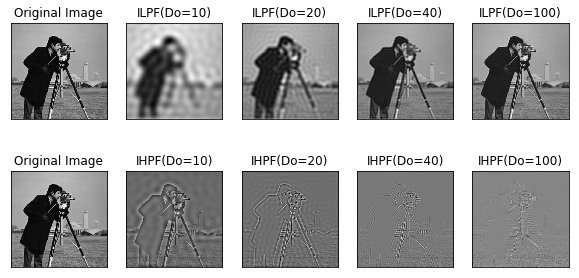

In [28]:
print('Ideal Filtering')
visualizeFilteringResults(imge, F, gsILP, gsIHP, Dos, 'Ideal')

Butterworth Filtering


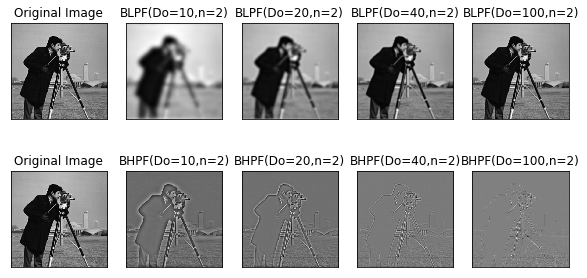

In [29]:
print('Butterworth Filtering')
visualizeFilteringResults(imge, F, gsBLP, gsBHP, Dos, 'Butterworth', ns.astype(int))

Now, we will compare the running time of the filtering methods

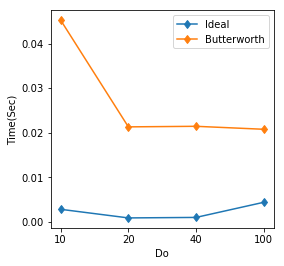

In [30]:
#Plot the running times

fig = plt.figure(figsize=[4,4])
numDo = len(IRunningTime)

plt.plot(xrange(numDo), IRunningTime, '-d')
plt.hold
plt.plot(xrange(numDo), BRunningTime, '-d')

xlabels = [str(int(Do)) for Do in Dos]
plt.xticks(xrange(numDo), xlabels)
plt.xlabel("Do")
plt.ylabel("Time(Sec)")
plt.legend(['Ideal', 'Butterworth'], loc=0)
plt.show()

From the above results, we can see that Ideal Filter is much faster than Butterworth. But Butterworth filtering  is smoother in its results.

In the previous calculations, we have used a constant value of $n$ when computing a butterworth filtering. Now, let's do for different value of n with a fixed cut off frequency to see it effects on the output.

In [31]:
Dos = np.ones(4, dtype=int)*10 #Constant Cut-off frequency
ns = [1, 2, 5, 20]

gsBLP, gsBHP, _ = computeButterFilters(imge, F, D, Dos, ns)

/home/tom/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':


Let's now visualize the butterworth filtering results

Butterworth Filtering


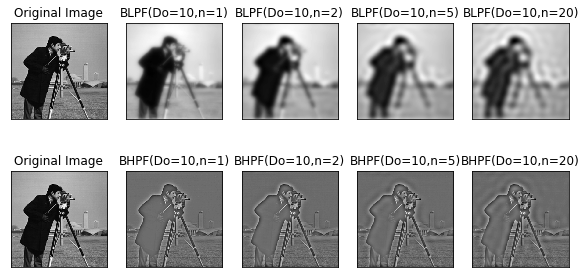

In [32]:
print('Butterworth Filtering')
visualizeFilteringResults(imge, F, gsBLP, gsBHP, Dos, 'Butterworth', ns)

As can be seen in the above results, there ringing effect in the images is increased as the value of the order $n$ increases.